**Lab-07 Decision Tree and Random Forest**

Ở Bài thực hành này chúng ta sẽ tiến hành làm quen với thư viện sklearn thuật toán Decision Tree với các Parameters như max_depth, max_features...

*Thuật toán Random Forest
1. Lấy ngẫu nhiên $n$ dữ liệu từ bộ dữ liệu với kĩ thuật Bootstrapping, hay còn gọi là random sampling with replacement. Tức là chúng ta sẽ lấy mẫu một số dữ liệu từ tập dữ liệu ban đầu. Khi dùng kĩ thuật này thì tập n dữ liệu mới của mình có thể có những dữ liệu bị trùng nhau.
2. Sau khi sample được n dữ liệu từ bước 1 thì mình chọn ngẫu nhiên k thuộc tính ($k$ < $m$, $m$ là số features). Giờ mình được bộ dữ liệu mới gồm n dữ liệu và mỗi dữ liệu có k thuộc tính.
3. Dùng thuật toán Decision Tree để xây dựng cây quyết định với bộ dữ liệu ở bước 2.
4. Sau khi có $n$ kết quả ta tiến hành voting, kết quả dự đoán của thuật toán Random Forest sẽ được tổng hợp từ các cây quyết định này.


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/huynhthanh98/ML/master/lab-07/bt1.csv", header=None)

In [3]:
df.shape

(1728, 7)

In [4]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Data trong bài thực hành này gồm 7 features, từ 0 đến 6, do đó ta đặt tên lại cho từng feature

In [5]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [6]:
#Check xem có feature nào có null không
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [7]:
# Chia ra tập training và tập testing
X = df.drop(['class'], axis=1)

y = df['class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [8]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1157, 6), (571, 6))

In [9]:
#convert các feature từ string sang int
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [10]:
#check type 
X_train.dtypes

buying      int32
maint       int32
doors       int32
persons     int32
lug_boot    int32
safety      int32
dtype: object

In [11]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


In [12]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [13]:
clf_gini = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0, max_features=None) 
#max_feature=None nghĩa lấy hết các features
#max_depth là độ sâu của cây 
#criterion là chọn phương pháp để đánh giá khi phân chia nhánh, trong lý thuyết mình chỉ được học entropy 

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [14]:
accuracy = clf_gini.score(X_test,y_test)
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy))

Model accuracy score with criterion gini index: 0.8021


In [15]:
#Check accuracy trên tập training để xem model có bị overfitting hay không
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini
print('Training-set accuracy score: {0:0.4f}'. format(clf_gini.score(X_train,y_train)))

Training-set accuracy score: 0.7865


[Text(133.92000000000002, 190.26, 'X[5] <= 1.5\nentropy = 1.2\nsamples = 1157\nvalue = [255, 49, 813, 40]'),
 Text(66.96000000000001, 135.9, 'entropy = 0.0\nsamples = 386\nvalue = [0, 0, 386, 0]'),
 Text(200.88000000000002, 135.9, 'X[3] <= 2.5\nentropy = 1.474\nsamples = 771\nvalue = [255, 49, 427, 40]'),
 Text(133.92000000000002, 81.53999999999999, 'X[0] <= 2.5\nentropy = 1.638\nsamples = 525\nvalue = [255, 49, 181, 40]'),
 Text(66.96000000000001, 27.180000000000007, 'entropy = 0.995\nsamples = 271\nvalue = [124, 0, 147, 0]'),
 Text(200.88000000000002, 27.180000000000007, 'entropy = 1.759\nsamples = 254\nvalue = [131, 49, 34, 40]'),
 Text(267.84000000000003, 81.53999999999999, 'entropy = 0.0\nsamples = 246\nvalue = [0, 0, 246, 0]')]

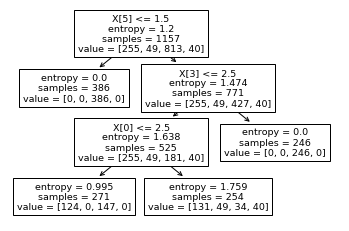

In [16]:
tree.plot_tree(clf_gini)

In [ ]:
#Vẽ thử cây ra
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names=X_train.columns,class_names=list(y_train.unique()))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

# Bài tập

1. Hãy thử thay đổi Max_depth để tăng accuracy trên tập testing, vẽ cây với Max_depth đã thay đổi.
2. max_depth ảnh hưởng như thế nào đối với mô hình decision tree, vì sao?
3. Dùng dataset bên dưới, từ mô hình Decision Tree hãy code thêm mô hình Random Forest như thuật toán đã học. Thử tìm hiểu cách dùng Random Forest trong sklearn để so sánh kết quả.

1. Thay đổi Max_depth để tăng accuracy trên tập testing

In [78]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier



test_accs = []
train_accs = []
depths = [i for i in range(1,16)] #Thử với các độ sâu từ 1-15
for depth in depths:
    clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=0, max_features=None) 
    #max_feature=None nghĩa lấy hết các features
    #max_depth là độ sâu của cây 
    #criterion là chọn phương pháp để đánh giá khi phân chia nhánh, trong lý thuyết mình chỉ được học entropy 

    # fit the model
    clf_entropy.fit(X_train, y_train)
    
    accuracy = clf_entropy.score(X_test, y_test)
    accuracy_train = clf_entropy.score(X_train, y_train)
    
    test_accs.append(accuracy)
    train_accs.append(accuracy_train)
    
    print('Model accuracy score with depth={0} in Test set and Training set are: {1:0.4f} --- {2:0.4f}'.format(depth, accuracy, accuracy_train))

Model accuracy score with depth=1 in Test set and Training set are: 0.7619 --- 0.7244
Model accuracy score with depth=2 in Test set and Training set are: 0.7706 --- 0.7635
Model accuracy score with depth=3 in Test set and Training set are: 0.7706 --- 0.7635
Model accuracy score with depth=4 in Test set and Training set are: 0.7879 --- 0.7858
Model accuracy score with depth=5 in Test set and Training set are: 0.7879 --- 0.8361
Model accuracy score with depth=6 in Test set and Training set are: 0.7619 --- 0.8622
Model accuracy score with depth=7 in Test set and Training set are: 0.7835 --- 0.8864
Model accuracy score with depth=8 in Test set and Training set are: 0.7662 --- 0.9199
Model accuracy score with depth=9 in Test set and Training set are: 0.7013 --- 0.9479
Model accuracy score with depth=10 in Test set and Training set are: 0.7359 --- 0.9683
Model accuracy score with depth=11 in Test set and Training set are: 0.7359 --- 0.9777
Model accuracy score with depth=12 in Test set and T

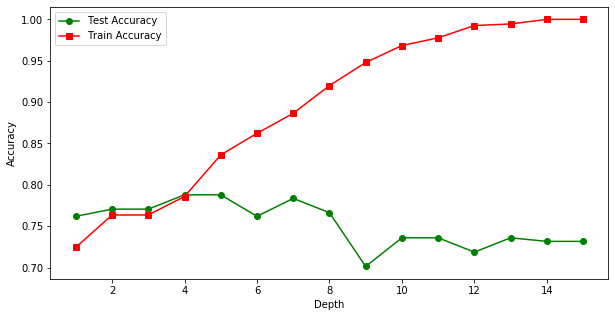

In [79]:
import matplotlib.pyplot as plt

def plot_acc(test, train, depth_lst):
    plt.figure(figsize=(10,5))
    plt.plot(depth_lst, test, 'go-', label='Test Accuracy')
    plt.plot(depth_lst, train, 'rs-', label='Train Accuracy')
    plt.xlabel('Depth')
    plt.ylabel('Accuracy')

    plt.legend()
    plt.show()

plot_acc(test_accs, train_accs, depths)
    

Vẽ cây với Max_depth=4, chính là vị trí mà accuracy trên 2 tập Train và Test gần nhau nhất

Với độ sâu 4 thì Decision Tree cho Accuracy cao nhất và không bị overfitting

In [81]:
#Vẽ cây


2. Max_depth ảnh hưởng như thế nào đối với mô hình decision tree, vì sao?

Độ sâu tối đa của một nhánh trong Decision Tree sẽ ảnh hưởng đến perfomance của mô hình Decision Tree
- Nếu độ sâu quá nhỏ, các nhánh trong cây sẽ chưa đạt được độ Pure đủ lớn, Entropy (một số) node lá còn cao. Chính là trường hợp underfitting
- Nếu độ sâu của cây quá lớn, tất cả các nhánh đều Pure, Entropy đều bằng 0 tại node lá. Trên tập test lúc này sẽ có kết quả dự đoán là 100%. Trong khi tập test, hoặc data thực tế sẽ cho kết quả dự đoán tệ. Mô hình overfitting

3. Dùng dataset bên dưới, từ mô hình Decision Tree hãy code thêm mô hình Random Forest như thuật toán đã học. Thử tìm hiểu cách dùng Random Forest trong sklearn để so sánh kết quả.

In [83]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [84]:
data=pd.read_csv("https://raw.githubusercontent.com/huynhthanh98/ML/master/lab-07/bt2.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Đây là data dự đoán một người có bị bênh tiểu đường hay không

In [85]:
X_train, X_test, y_train, y_test = train_test_split(data[data.columns.difference(["Outcome"])], data["Outcome"], test_size=0.3, random_state=1) # 70% training and 30% test

In [86]:
X_train.shape #Check no of features

(537, 8)

In [87]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

#Mô hình Decision Tree thuần, với một cây duy nhất.
test_accs = []
train_accs = []
depths = [i for i in range(1,20)]
for depth in depths:
    clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=0, max_features=None) 
    #max_feature=None nghĩa là lấy hết các features
    #max_depth: độ sâu của cây 
    #criterion: tiêu chuẩn đánh giá khi phân chia nhánh

    # fit the model
    clf_entropy = clf_entropy.fit(X_train, y_train)
    
    accuracy = clf_entropy.score(X_test, y_test)
    accuracy_train = clf_entropy.score(X_train, y_train)
    
    test_accs.append(accuracy)
    train_accs.append(accuracy_train)
    print('Model accuracy score with depth={0} in Test set and Training set are: {1:0.4f} --- {2:0.4f}'.format(depth, accuracy, accuracy_train))

Model accuracy score with depth=1 in Test set and Training set are: 0.7619 --- 0.7244
Model accuracy score with depth=2 in Test set and Training set are: 0.7706 --- 0.7635
Model accuracy score with depth=3 in Test set and Training set are: 0.7706 --- 0.7635
Model accuracy score with depth=4 in Test set and Training set are: 0.7879 --- 0.7858
Model accuracy score with depth=5 in Test set and Training set are: 0.7879 --- 0.8361
Model accuracy score with depth=6 in Test set and Training set are: 0.7619 --- 0.8622
Model accuracy score with depth=7 in Test set and Training set are: 0.7835 --- 0.8864
Model accuracy score with depth=8 in Test set and Training set are: 0.7662 --- 0.9199
Model accuracy score with depth=9 in Test set and Training set are: 0.7013 --- 0.9479
Model accuracy score with depth=10 in Test set and Training set are: 0.7359 --- 0.9683
Model accuracy score with depth=11 in Test set and Training set are: 0.7359 --- 0.9777
Model accuracy score with depth=12 in Test set and T

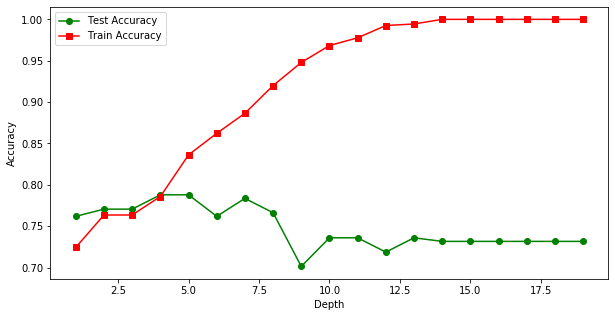

In [88]:
plot_acc(test_accs, train_accs, depths)

Xây dựng thuật toán cho Random Forest

In [89]:
from random import randrange, sample, choices
from pandas import DataFrame

#Hàm lấy tập con trên tập dữ liệu (đã tách nhãn) cho trước
def subsample(dataset, label, ratio):
    sample = list()
    sample_label = list()
    n_sample = round(len(dataset) * ratio)
    while len(sample) < n_sample:
        index = randrange(len(dataset))
        sample.append(dataset.iloc[index,])
        sample_label.append(label.values[index])
    return DataFrame(sample), sample_label

#Chọn random n_features trong data set có nhiều feature
def subfeatures(dataset, n_features):
    return sample(list(dataset.columns.values), k=n_features)

In [90]:
random_features = sample(list(X_test.columns.values), k=5)
random_features

['BMI', 'Age', 'DiabetesPedigreeFunction', 'BloodPressure', 'SkinThickness']

In [100]:
def subtrees_predict(X_train, y_train, X_test, y_test, n_trees, size_subset, n_feature):
    '''
    Input:
    n_trees: Số cây con
    size_subset: Tỉ lệ tập con (để xây dựng cây con) so với tập train [0:1]
    n_feature: Số features cây con sử dụng
    
    Return: Dataframe chứa thông tin dự đoán của từng cây con trên tập test
    '''
    d = {'index': [i for i in range(len(X_test))]}
    df_predict = pd.DataFrame(data=d)
    
    for i in range(n_trees): #Random forest với n_trees cây con
        subset, subset_label = subsample(X_train, y_train, size_subset)# Lấy ra 1 tập con bằng size_subset tổng tập Train
        clf = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=0, max_features=None) 
        #max_feature=None: lấy hết các features do sẽ tách tập con với số feature nhỏ hơn ban đầu
        #max_depth=None: chia đến khi nhánh pure

        sub_features = subfeatures(subset, n_feature) #lấy ra ramdom n_feature features trong tổng số 8 feartures của bộ dữ liệu

        # fit the model
        clf = clf.fit(subset[sub_features], subset_label) #Train 1 cây con với tập data nhỏ và nhãn tương ứng
        predicted = clf.predict(X_test[sub_features]) #Predict với cây này trên tập Test
        column_name = "Tree_" + str(i)
        df_predict[column_name] = predicted #Lưu vào data frame
    
    
    df_predict = df_predict.drop(['index'], axis=1)
    return df_predict



def vote(df):
    '''
    Input: df là output của hàm subtrees_predict()
    Return: Dataframe chứa thông tin dự đoán của từng cây con trên tập test và add thêm cột kết quả vote của các cây con
    '''
    voted = []
    for i in range(len(df)):
        predictions = list(df.iloc[i,])
        voted.append(max(set(predictions), key=predictions.count))

    df['Voted'] = voted
    return df


def Random_Forest(X_train, y_train, X_test, y_test, n_trees, size_subset, n_feature):
    df_test_predict = subtrees_predict(X_train, y_train, X_test, y_test, n_trees, size_subset, n_feature)
    return vote(df_test_predict)

In [114]:
#Test hàm con subtrees_predict
a = subtrees_predict(X_train, y_train, X_test, y_test, n_trees=5, size_subset=0.6, n_feature=5)
a

,Tree_0,Tree_1,Tree_2,Tree_3,Tree_4
0,0,0,1,0,0
1,1,0,1,0,0
2,0,0,0,0,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
226,0,1,0,1,0
227,0,0,0,0,0
228,0,0,0,0,0
229,1,0,1,0,1


In [115]:
#Test hàm con vote
vote(a)

,Tree_0,Tree_1,Tree_2,Tree_3,Tree_4,Voted
0,0,0,1,0,0,0
1,1,0,1,0,0,0
2,0,0,0,0,0,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
226,0,1,0,1,0,0
227,0,0,0,0,0,0
228,0,0,0,0,0,0
229,1,0,1,0,1,1


In [123]:
#Chạy hàm Random_Forest
RD_result = Random_Forest(X_train, y_train, X_test, y_test, n_trees=20, size_subset=0.2, n_feature=5)
RD_result.sample(10)

,Tree_0,Tree_1,Tree_2,Tree_3,Tree_4,Tree_5,Tree_6,Tree_7,Tree_8,Tree_9,...,Tree_11,Tree_12,Tree_13,Tree_14,Tree_15,Tree_16,Tree_17,Tree_18,Tree_19,Voted
219,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,1,0
47,1,1,1,0,1,0,1,0,1,1,...,0,0,1,1,1,0,1,1,0,1
209,0,0,0,1,1,0,0,1,1,1,...,0,0,1,1,1,1,0,1,0,0
105,0,0,0,1,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
194,1,1,1,0,0,0,1,0,1,1,...,0,1,1,1,1,0,1,1,0,1
185,0,0,0,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
21,0,0,1,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
217,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
150,0,1,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
63,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [124]:
from sklearn.metrics import accuracy_score
h_accuracy = accuracy_score(RD_result['Voted'], y_test)
print(f'Hand build Random Forest Accuracy: {h_accuracy}')

Hand build Random Forest Accuracy: 0.7835497835497836


In [122]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20, criterion='entropy', max_depth=None, random_state=0, max_features=5) 
clf = clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
sk_accuracy = accuracy_score(predicted, y_test)
print(f'sklearn Random Forest Accuracy: {sk_accuracy}')

sklearn Random Forest Accuracy: 0.7965367965367965
